In [1]:
from collections import OrderedDict
import string
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

import re

import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

import gensim
import logging
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger
from gensim.corpora.textcorpus import TextCorpus

In [2]:
path = 'data/'
df_train1 = pd.read_csv(path+'Corona_NLP_train.csv', encoding='latin-1')
df_train2 = pd.read_csv(path+'Corona_NLP_test.csv')
df_train1.info()
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+

In [3]:
frames = [df_train1, df_train2]
df_train = pd.concat(frames, ignore_index=True, sort=False)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Data Preprocessing

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiasongsun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jiasongsun/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
import unidecode
import unicodedata
Lanc = LancasterStemmer()
def containsNumber(value):
    for character in value:
        if character.isdigit():
            return True
    return False

In [7]:
def clean_data(text):
    text = str(text).strip()
    text = text.replace("?","")
    text = re.sub(r"http\S+","",text)
    text = re.sub(r"@\w+","",text)
    text = re.sub(r"#\w+","",text)
    text = re.sub(r"\d+","",text)
    text = re.sub(r"<.*?>","",text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub('(([\\xbc-\\xbe])?)', '', text) 
    text = re.sub(r'[àáâãäå]', '', text)
    text = re.sub(r'[èéêë]', '', text)
    text = re.sub(r'[ìíîï]', '', text)
    text = re.sub(r'[òóôõö]', '', text)
    text = re.sub(r'[ùúûü]', '', text)
    text = Lanc.stem(text)
    text = text.split()
    #text = " ".join([word for word in text if [char in word isnumeric()]])
    text = " ".join([word for word in text if not word in stop_words])
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    #text = str(text).strip()
    return text

In [8]:
stop_words = stopwords.words('english')
df_train["OriginalTweet"]  = df_train['OriginalTweet'].apply(lambda x:x.lower())

In [9]:
df_train["OriginalTweet"] = df_train['OriginalTweet'].apply(lambda x : clean_data(x))

In [10]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,Neutral
1,3800,48752,UK,16-03-2020,advice talk family exchange phone create conta...,Positive
2,3801,48753,Vagabonds,16-03-2020,give elderly disabled shopping amid covid outb...,Positive
3,3802,48754,NaN,16-03-2020,food stock one empty please panic enough food ...,Positive
4,3803,48755,NaN,16-03-2020,ready go supermarket outbreak paranoid food st...,Extremely Negative


In [11]:
df = df_train.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35531 entries, 0 to 44954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       35531 non-null  int64 
 1   ScreenName     35531 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        35531 non-null  object
 4   OriginalTweet  35531 non-null  object
 5   Sentiment      35531 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
df.OriginalTweet

0                                                         
1        advice talk family exchange phone create conta...
2        give elderly disabled shopping amid covid outb...
5        news first confirmed covid case came county la...
6        cashier grocery store prove credibility civics...
                               ...                        
44949    call general assembly enact legal stay debt co...
44950    meanwhile supermarket people dance sing togeth...
44951    panic buy lot non perishable echo needs food a...
44952    prof economics talking recent research impact ...
44954    safety end covid rest assured tissue produce ship
Name: OriginalTweet, Length: 35531, dtype: object

In [13]:
df['OriginalTweet'].replace('', np.nan, inplace=True)

/Users/jiasongsun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
df.OriginalTweet

0                                                      NaN
1        advice talk family exchange phone create conta...
2        give elderly disabled shopping amid covid outb...
5        news first confirmed covid case came county la...
6        cashier grocery store prove credibility civics...
                               ...                        
44949    call general assembly enact legal stay debt co...
44950    meanwhile supermarket people dance sing togeth...
44951    panic buy lot non perishable echo needs food a...
44952    prof economics talking recent research impact ...
44954    safety end covid rest assured tissue produce ship
Name: OriginalTweet, Length: 35531, dtype: object

In [15]:
df.dropna(inplace = True)

/Users/jiasongsun/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice talk family exchange phone create conta...,Positive
2,3801,48753,Vagabonds,16-03-2020,give elderly disabled shopping amid covid outb...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news first confirmed covid case came county la...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier grocery store prove credibility civics...,Positive
7,3806,48758,Austria,16-03-2020,supermarket today buy toilet paper,Neutral


In [17]:
df_t = df.drop(['UserName','ScreenName','Location','Sentiment'],axis =1)

In [18]:
df_t

,TweetAt,OriginalTweet
1,16-03-2020,advice talk family exchange phone create conta...
2,16-03-2020,give elderly disabled shopping amid covid outb...
5,16-03-2020,news first confirmed covid case came county la...
6,16-03-2020,cashier grocery store prove credibility civics...
7,16-03-2020,supermarket today buy toilet paper
...,...,...
44949,16-03-2020,call general assembly enact legal stay debt co...
44950,16-03-2020,meanwhile supermarket people dance sing togeth...
44951,16-03-2020,panic buy lot non perishable echo needs food a...
44952,16-03-2020,prof economics talking recent research impact ...


In [19]:
df_t['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020', '02-03-2020', '03-03-2020',
       '04-03-2020', '05-03-2020', '06-03-2020', '07-03-2020',
       '08-03-2020', '09-03-2020', '10-03-2020', '11-03-2020',
       '12-03-2020', '13-03-2020', '14-03-2020', '15-03-2020'],
      dtype=object)

In [20]:
from datetime import datetime
df_t['TweetAt'] = pd.to_datetime(df_t['TweetAt'], dayfirst=True)
#data['RANK'] = data.groupby('ID')['TIME'].rank(ascending=True)

In [21]:
df_t['TweetAt'].unique()

array(['2020-03-16T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-24T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-26T00:00:00.000000000', '2020-03-27T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-04-02T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-05T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
       '2020-04-07T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-12

In [22]:
df_t['TweetAt']

1       2020-03-16
2       2020-03-16
5       2020-03-16
6       2020-03-16
7       2020-03-16
           ...    
44949   2020-03-16
44950   2020-03-16
44951   2020-03-16
44952   2020-03-16
44954   2020-03-16
Name: TweetAt, Length: 35429, dtype: datetime64[ns]

In [23]:
df_time = df_t

In [24]:
df_time.sort_values(by = 'TweetAt')

,TweetAt,OriginalTweet
41157,2020-03-02,new encounter empty supermarket pictured sold ...
41158,2020-03-02,find hand turned pack check driving
41160,2020-03-02,city anxious stock food medical worker becomes...
41161,2020-03-03,one week everyone baby milk powder next everyo...
41162,2020-03-03,remember last time gallon regular gas pump goi...
...,...,...
41027,2020-04-14,deck insanely good great data consumer behavio...
41025,2020-04-14,feel best way handle supermarket regarding cov...
41023,2020-04-14,remember back day youd go grocery store blast ...
41019,2020-04-14,wore long pants long sleeved tee shirt basebal...


In [53]:
#df_time.drop(df_time[df_time['TweetAt'] == '2020-03-03'].index, inplace = True)
small_df1 = df_time[(df_time['TweetAt'] == '2020-03-05')]
small_df2 = df_time[(df_time['TweetAt'] == '2020-03-13')]
small_df3 = df_time[(df_time['TweetAt'] == '2020-03-25')]
small_df4 = df_time[(df_time['TweetAt'] == '2020-04-08')]
small_df5 = df_time[(df_time['TweetAt'] == '2020-04-13')]

frames2 = [small_df1,small_df2,small_df3,small_df4,small_df5]
df_new = pd.concat(frames2, ignore_index=True, sort=False)
                   
#                   \
#                  or (df_time['TweetAt'] == '2020-03-25') or (df_time['TweetAt'] == '2020-04-8')\
#                   or (df_time['TweetAt'] == '2020-04-13')]
#small_df = df_time[df_time['TweetAt'] == '2020-03-02'& df_time['TweetAt'] == '2020-03-15' & df_time['TweetAt'] == '2020-03-31'
 #                 & df_time['TweetAt'] == '2020-04-05' & df_time['TweetAt'] == '2020-04-14']

In [54]:
df_new

,TweetAt,OriginalTweet
0,2020-03-05,precautionary taken respective comment covid h...
1,2020-03-05,food buy extra local food bank many dont luxur...
2,2020-03-05,show like live nine days hard like metal plast...
3,2020-03-05,people starting become frightened many meanwhi...
4,2020-03-05,think credit debit good comes keep mind transa...
...,...,...
5995,2020-04-13,keeping date latest
5996,2020-04-13,learn according w greater risk reasonable cons...
5997,2020-04-13,business platform designed corporate expanding...
5998,2020-04-13,vacation burn year going non inclusive grocery...


In [56]:
df_new.sort_values(by = 'TweetAt',inplace = True)

In [57]:
df_new

,TweetAt,OriginalTweet
0,2020-03-05,precautionary taken respective comment covid h...
1,2020-03-05,food buy extra local food bank many dont luxur...
2,2020-03-05,show like live nine days hard like metal plast...
3,2020-03-05,people starting become frightened many meanwhi...
4,2020-03-05,think credit debit good comes keep mind transa...
...,...,...
5232,2020-04-13,guide coffee
5231,2020-04-13,effort stabilize amid pandemic oil agreed big ...
5230,2020-04-13,russia oil agreed cut output record amount glo...
5236,2020-04-13,never return school covid first group working ...


In [59]:
time_uniq = df_new['TweetAt'].unique()

In [70]:
#f_d1 = df_t.loc[df_t['TweetAt'] == '16-03-2020']
#f_d2 = df_t.loc[df_t['TweetAt'] == '17-03-2020']

In [71]:
#a = f_d1.drop(['TweetAt'],axis =1)
#b = f_d2.drop(['TweetAt'],axis =1)

In [60]:
#nnn = [a, b]
#corpus = pd.concat(nnn, ignore_index=True, sort=False)
#tar = corpus.astype(str).values.tolist()
tar = df_new['OriginalTweet'].astype(str).values.tolist()

In [61]:
tar

['precautionary taken respective comment covid hotel enforce precautionary issue safety hygiene',
 'food buy extra local food bank many dont luxury spend beyond weekly budget',
 'show like live nine days hard like metal plastic glass deputy commissioner consumer mary flores keep clean gas pump watch share',
 'people starting become frightened many meanwhile turn empty sold disinfection liquid sold sold exorbitant',
 'think credit debit good comes keep mind transaction many people grocery store gas station touch every day',
 'first time week local supermarket delivery loo paper brought security guard supervise seriously taking way home feel like lotto',
 'fight white gold real probably coming supermarket near',
 'well long didnt contract crowded grocery store tonight good leave house fortunately didnt need soup',
 'trust reaction shut heart trust government job work ability get go grocery store god',
 'like typical working day except school almost akin morning supermarket full seen go p

In [62]:
x = []
for i in range(len(tar)):
    x.append(tar[i].split())
    

In [63]:
x

[['precautionary',
  'taken',
  'respective',
  'comment',
  'covid',
  'hotel',
  'enforce',
  'precautionary',
  'issue',
  'safety',
  'hygiene'],
 ['food',
  'buy',
  'extra',
  'local',
  'food',
  'bank',
  'many',
  'dont',
  'luxury',
  'spend',
  'beyond',
  'weekly',
  'budget'],
 ['show',
  'like',
  'live',
  'nine',
  'days',
  'hard',
  'like',
  'metal',
  'plastic',
  'glass',
  'deputy',
  'commissioner',
  'consumer',
  'mary',
  'flores',
  'keep',
  'clean',
  'gas',
  'pump',
  'watch',
  'share'],
 ['people',
  'starting',
  'become',
  'frightened',
  'many',
  'meanwhile',
  'turn',
  'empty',
  'sold',
  'disinfection',
  'liquid',
  'sold',
  'sold',
  'exorbitant'],
 ['think',
  'credit',
  'debit',
  'good',
  'comes',
  'keep',
  'mind',
  'transaction',
  'many',
  'people',
  'grocery',
  'store',
  'gas',
  'station',
  'touch',
  'every',
  'day'],
 ['first',
  'time',
  'week',
  'local',
  'supermarket',
  'delivery',
  'loo',
  'paper',
  'brought',


In [64]:
from gensim import corpora
dictionary = corpora.Dictionary(x)
corpus = [dictionary.doc2bow(text) for text in x]
#import pickle
#pickle.dump(corpus, open('corpus.pkl', 'wb'))
#dictionary.save('dictionary.gensim')

In [65]:
dictionary

In [66]:
len(time_uniq)

5

In [68]:
time_slice = []
for i in range(len(time_uniq)):
    subset_df = df_new[df_new['TweetAt'] == time_uniq[i]]
    column_count = subset_df['TweetAt'].count()
    time_slice.append(column_count)

In [69]:
len(time_slice)

5

In [71]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=time_slice, num_topics=5, passes=20)
#ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, time_slice=time_slice, num_topics=5)

/Users/jiasongsun/opt/anaconda3/lib/python3.9/site-packages/gensim/models/ldaseqmodel.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


### Plot time series

In [105]:
cases = np.loadtxt('cases.txt', dtype=str)

In [106]:
cases

array(['2020-03-02,104,6', '2020-03-03,125,10', '2020-03-04,161,12',
       '2020-03-05,228,12', '2020-03-06,311,15', '2020-03-07,428,19',
       '2020-03-08,547,22', '2020-03-09,748,26', '2020-03-10,1018,31',
       '2020-03-11,1263,37', '2020-03-12,1668,43', '2020-03-13,2224,50',
       '2020-03-14,2898,60', '2020-03-15,3600,68', '2020-03-16,4507,91',
       '2020-03-17,5906,117', '2020-03-18,8350,162',
       '2020-03-19,12393,212', '2020-03-20,18012,277',
       '2020-03-21,24528,360', '2020-03-22,33073,458',
       '2020-03-23,43505,579', '2020-03-24,53938,785',
       '2020-03-25,68572,1054', '2020-03-26,85570,1353',
       '2020-03-27,102900,1770', '2020-03-28,123966,2300',
       '2020-03-29,142486,2718', '2020-03-30,163955,3368',
       '2020-03-31,188461,4304', '2020-04-01,215391,5325',
       '2020-04-02,245108,6541', '2020-04-03,277426,7932',
       '2020-04-04,312525,9488', '2020-04-05,338141,10856',
       '2020-04-06,369057,12382', '2020-04-07,399394,14616',
       '2020

In [107]:
import matplotlib.pyplot as plt

home = []

Text(0.5, 1.0, 'Social')

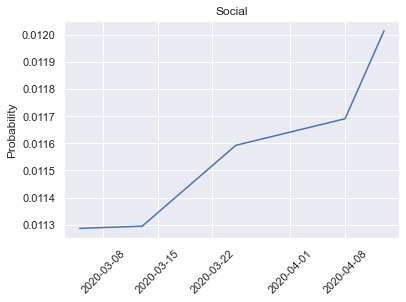

In [108]:
for i in range(5):
    for j in range(20):
        if ldaseq.print_topics(time=i)[0][j][0] == 'home':
            home.append(ldaseq.print_topics(time=i)[0][j][1])
home

plt.plot(time_uniq,home)
plt.xticks(rotation=45)
plt.ylabel('Probability')
plt.title('Social')

Text(0.5, 1.0, 'Grocery')

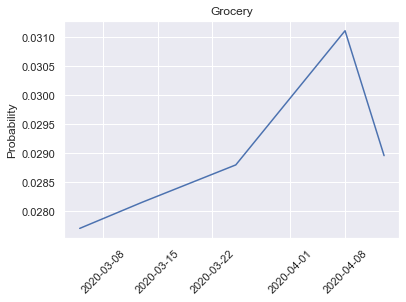

In [109]:
grocery = []
for i in range(5):
    for j in range(20):
        if ldaseq.print_topics(time=i)[1][j][0] == 'grocery':
            grocery.append(ldaseq.print_topics(time=i)[1][j][1])
grocery
plt.plot(time_uniq,grocery)
plt.xticks(rotation=45)
plt.ylabel('Probability')
plt.title('Grocery')

Text(0.5, 1.0, 'Panic')

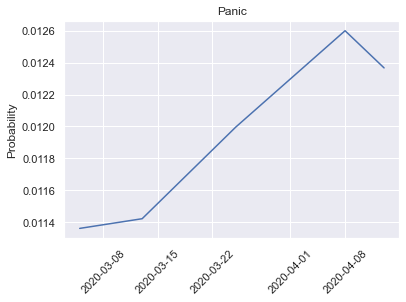

In [110]:
pandemic = []
for i in range(5):
    for j in range(20):
        if ldaseq.print_topics(time=i)[2][j][0] == 'pandemic':
            pandemic.append(ldaseq.print_topics(time=i)[2][j][1])
pandemic
plt.plot(time_uniq,pandemic)
plt.xticks(rotation=45)
plt.ylabel('Probability')
plt.title('Panic')

Text(0.5, 1.0, 'Toilet Paper')

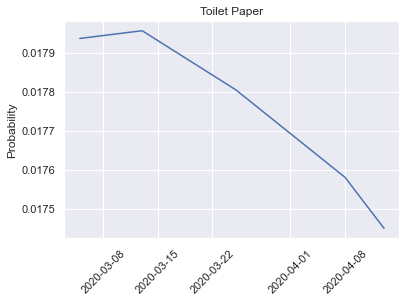

In [111]:
toilet = []
for i in range(5):
    for j in range(20):
        if ldaseq.print_topics(time=i)[3][j][0] == 'toilet':
            toilet.append(ldaseq.print_topics(time=i)[3][j][1])
toilet
plt.plot(time_uniq,toilet)
plt.xticks(rotation=45)
plt.ylabel('Probability')
plt.title('Toilet Paper')

In [112]:
price =[]
for i in range(5):
    for j in range(20):
        if ldaseq.print_topics(time=i)[4][j][0] == 'price':
            price.append(ldaseq.print_topics(time=i)[4][j][1])
price

[0.0060830845129621865,
 0.006040044288774149,
 0.005930179546945023,
 0.0057305958398218265,
 0.005673656826210484]

In [113]:
time_uniq

array(['2020-03-05T00:00:00.000000000', '2020-03-13T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-13T00:00:00.000000000'], dtype='datetime64[ns]')

Text(0.5, 1.0, 'Retail')

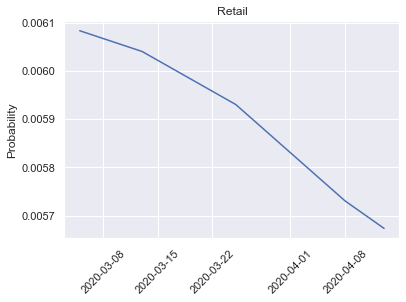

In [114]:
import matplotlib.pyplot as plt

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(time_uniq,price)
plt.xticks(rotation=45)
plt.ylabel('Probability')
plt.title('Retail')
#plt.gcf().autofmt_xdate()

In [115]:
ldaseq.print_topics(time=1)

[[('food', 0.02145368749851363),
  ('stock', 0.015028266509451488),
  ('covid', 0.014813996608713709),
  ('need', 0.014168870206423385),
  ('people', 0.013520478856060836),
  ('hand', 0.013067037064791833),
  ('supermarket', 0.012526944056297496),
  ('please', 0.011314479036451398),
  ('home', 0.011294294564314872),
  ('stay', 0.008272810281541152),
  ('use', 0.007930772270739373),
  ('make', 0.007232549965998494),
  ('safe', 0.00679997050878517),
  ('help', 0.006617032147513454),
  ('keep', 0.0064109044775932066),
  ('many', 0.006327081912884506),
  ('face', 0.0060330451445255095),
  ('buy', 0.006017410818598171),
  ('mask', 0.005992769719273594),
  ('go', 0.005603109363466432)],
 [('store', 0.03287739692004281),
  ('grocery', 0.028155967961942086),
  ('supermarket', 0.02747503435579304),
  ('covid', 0.017861152533046112),
  ('get', 0.01230309918442178),
  ('shopping', 0.011011599640241504),
  ('people', 0.009722646594543975),
  ('one', 0.009308090435458265),
  ('time', 0.009035916060

In [74]:
ldaseq.print_topics(time=2)

[[('food', 0.021024250678834386),
  ('covid', 0.015341583540688238),
  ('stock', 0.014686966100068116),
  ('hand', 0.014185506703947822),
  ('need', 0.014157992940494217),
  ('people', 0.013545562086091988),
  ('supermarket', 0.012653588614511603),
  ('home', 0.011592460766600152),
  ('please', 0.011265389767863052),
  ('stay', 0.008571224676290408),
  ('use', 0.008255398527083457),
  ('make', 0.007406296102941154),
  ('safe', 0.007021717816484231),
  ('help', 0.0066253753680846385),
  ('keep', 0.00644613781359755),
  ('many', 0.006322600222631597),
  ('face', 0.006170788011658951),
  ('mask', 0.006148354137748334),
  ('buy', 0.005651917941362702),
  ('go', 0.0055701881499352806)],
 [('store', 0.03236128045870719),
  ('grocery', 0.028800825589997296),
  ('supermarket', 0.027714430413003224),
  ('covid', 0.019636033965402665),
  ('get', 0.012528188727278481),
  ('shopping', 0.010706235208053536),
  ('one', 0.00950372140077639),
  ('people', 0.009375021599052277),
  ('time', 0.0090611090

In [75]:
ldaseq.print_topics(time=3)

[[('food', 0.020740060709680343),
  ('covid', 0.015908115714977144),
  ('stock', 0.014406611759005403),
  ('need', 0.014171905174527197),
  ('hand', 0.014016771100538205),
  ('people', 0.013621079989412043),
  ('supermarket', 0.012809528345683024),
  ('home', 0.011690518647061552),
  ('please', 0.011236937220165548),
  ('stay', 0.0086221555296166),
  ('use', 0.008278192842068205),
  ('make', 0.007427028379385308),
  ('safe', 0.007138781137336162),
  ('help', 0.0066770298805995405),
  ('keep', 0.006526001492687165),
  ('many', 0.0064640210601683646),
  ('face', 0.006364503807202017),
  ('mask', 0.006144383411783152),
  ('go', 0.005541524454849114),
  ('buy', 0.005507888307709746)],
 [('store', 0.03349437145701146),
  ('grocery', 0.03111627452179588),
  ('supermarket', 0.027768612186948698),
  ('covid', 0.02160134862264464),
  ('get', 0.012632693189029539),
  ('shopping', 0.011017510799921481),
  ('one', 0.009779922853821347),
  ('people', 0.009291084116502599),
  ('time', 0.009043414903

In [76]:
ldaseq.print_topics(time=4)

[[('food', 0.020633612273073233),
  ('covid', 0.016270678871503946),
  ('stock', 0.014256892218705899),
  ('need', 0.014210124086232862),
  ('people', 0.013713419684117416),
  ('hand', 0.01358539232901727),
  ('supermarket', 0.012895889565917378),
  ('home', 0.012015080110907128),
  ('please', 0.01122482493000378),
  ('stay', 0.008509345911693427),
  ('use', 0.008207224450988147),
  ('make', 0.007588859563159139),
  ('safe', 0.0070717162400659485),
  ('help', 0.006734948378645355),
  ('keep', 0.006613409936570188),
  ('many', 0.00658564081386289),
  ('face', 0.006534851689867287),
  ('mask', 0.006186677395171712),
  ('buy', 0.005565424461567833),
  ('go', 0.005526026514146384)],
 [('store', 0.030379393819726788),
  ('grocery', 0.028960693854296383),
  ('supermarket', 0.027993238524512406),
  ('covid', 0.023000475316805137),
  ('get', 0.012977178044952454),
  ('shopping', 0.011440385524533301),
  ('one', 0.010085422827101353),
  ('people', 0.009542677837282305),
  ('time', 0.00909578571

### Prepare data for modeling

In [19]:
# Split the data into X and y data sets
X = df_t.OriginalTweet
y = df_t.Sentiment

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aa,aba,abandon,abandoned,abandonment,abate,abatement,abbreviation,abide,ability,...,zinc,zip,zo,zoic,zombie,zone,zoning,zoo,zoom,zoonotic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head(6)

,aa,aa truck,aba,aba list,abandon,abandon food,abandon need,abandon work,abandoned,abandoned chilled,...,zoom meeting,zoom morning,zoom shopping,zoom special,zoom stock,zoom video,zoonotic,zoonotic deeply,zoonotic disease,zoonotic waiting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
